In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [2]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [3]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#grab MNIST IMAGE ----> TENSORS

transform = transforms.ToTensor()



In [5]:
#Download train data
#Train set the train must = True, if not it become test data
train_data = datasets.MNIST(root='C:/Users/A221LPEN/Desktop/Pytorch_for_Deep_Learning/PYTORCH_NOTEBOOKS/myCodes/Data', train=True, download=True, transform=transform)

In [6]:
#Download test data
test_data = datasets.MNIST(root='C:/Users/A221LPEN/Desktop/Pytorch_for_Deep_Learning/PYTORCH_NOTEBOOKS/myCodes/Data', train=False, download=True, transform=transform)

In [7]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: C:/Users/A221LPEN/Desktop/Pytorch_for_Deep_Learning/PYTORCH_NOTEBOOKS/myCodes/Data
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

In [8]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Split: test
    Root Location: C:/Users/A221LPEN/Desktop/Pytorch_for_Deep_Learning/PYTORCH_NOTEBOOKS/myCodes/Data
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

In [9]:
type(train_data)

torchvision.datasets.mnist.MNIST

In [10]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [11]:
type(train_data[0])

tuple

In [12]:
image,label = train_data[0]

In [13]:
image.shape # the 1=grayscale, single colour channel, sometimes -1 to 1 instead 0 to 1 

torch.Size([1, 28, 28])

In [14]:
label

5

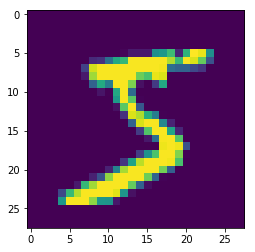

In [15]:
plt.imshow(image.reshape((28,28)))
#Displays an image, drop the info abour grayscale
#the program will know it by default
#matplotlib has default colour mapping --viridis


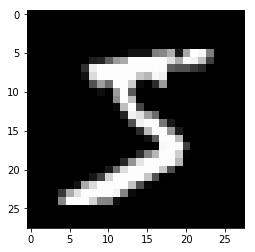

In [16]:
#to view in grayscale
plt.imshow(image.reshape((28,28)),cmap='gray') #or use gist_yarg for reversed

In [17]:
#lots of parameters required to train the 60k data
#therefore it makes sense to train in batches
#grab subsets of the 60k images & load them in
torch.manual_seed(101) #take the data from random shuffle

train_loader = DataLoader(train_data,batch_size=100,shuffle=True) #feed 100 images at a time out of the 60k into network images
#shuffle the data to make the program able to generelized the data 0 and 1 instead of focusing/learning on 1 type of data

test_loader = DataLoader(test_data,batch_size=500,shuffle=False)

In [18]:
#Note: train data is  the Pytorch dataset objects--objects that supports data loading & sampling
#batch size is number of records we process at a time
#If its not evenly divisable into dataset,then the final batch would contain that remainder
#setting the shuffle to True means that the dataset will be shuffled after each epoch


In [19]:
from torchvision.utils import make_grid  #make grid line
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}')) #FORMATTING


In [20]:
#FIRST BATCH
for images,labels in train_loader:
    #60K /100 ---this for loop will run 60 times
    #to get the first batch ONLY, adds in break
    break

In [21]:
images.shape #shape is (batch, colour channel, width, height)

torch.Size([100, 1, 28, 28])

In [22]:
labels.shape

torch.Size([100])

Labels [   0    5    7    8    6    7    9    7    1    3    8    4]


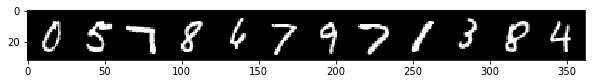

In [23]:
#print first 12 labels
print('Labels', labels[:12].numpy())

#print the first 12 images
im = make_grid(images[:12], nrow=12) #default nrow is 8
plt.figure(figsize=(10,4))
#transpose images from CWH to WHC
plt.imshow(np.transpose(im.numpy(), (1,2,0)));


In [24]:
#this is rather sloppy, 6 might be mistaken as 4

In [25]:
#PART 2 --Creating network

In [26]:
#create a normal multilayer perceptron model
class MultilayerPerceptron(nn.Module):
    
    def __init__(self,in_sz=784,out_sz=10,layers=[120,84]):
        
        super().__init__()
        
        #fully connected layer
        self.fc1 = nn.Linear(in_sz,layers[0]) #connect input layer to layer 0 or 120
        self.fc2 = nn.Linear(layers[0],layers[1])
        self.fc3 = nn.Linear(layers[1],out_sz)
        
        
    def forward(self,X):
        
        X = F.relu(self.fc1(X)) #relu as activation fn, parse in fully connvected layer 1 with X
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        
        return F.log_softmax(X,dim=1) #MULTI CLASS CLASSIFICATION
        

In [27]:
torch.manual_seed(101)
model = MultilayerPerceptron()
model

MultilayerPerceptron(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [28]:
# ANN ---> CNN
#CNN architecture is more efficient 
for param in model.parameters():
    print(param.numel())

94080
120
10080
84
840
10


In [29]:
# Connection=94080,Biases=120,Connection to next layer=10080, Biases=84,Cnnection to next layer=840, output neuron =10

In [30]:
# 105214 total parameters--these are all adjusted by network (less parameter = more efficient)


In [31]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [33]:
images.shape #convert the shape into single dimension [100,784]--flatten

torch.Size([100, 1, 28, 28])

In [35]:
images.view(100,-1).shape #-1 means grab the rest of dimension & combine them into single dimension


torch.Size([100, 784])